In [1]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv("house.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0


In [5]:
dataset.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
price            0
dtype: int64

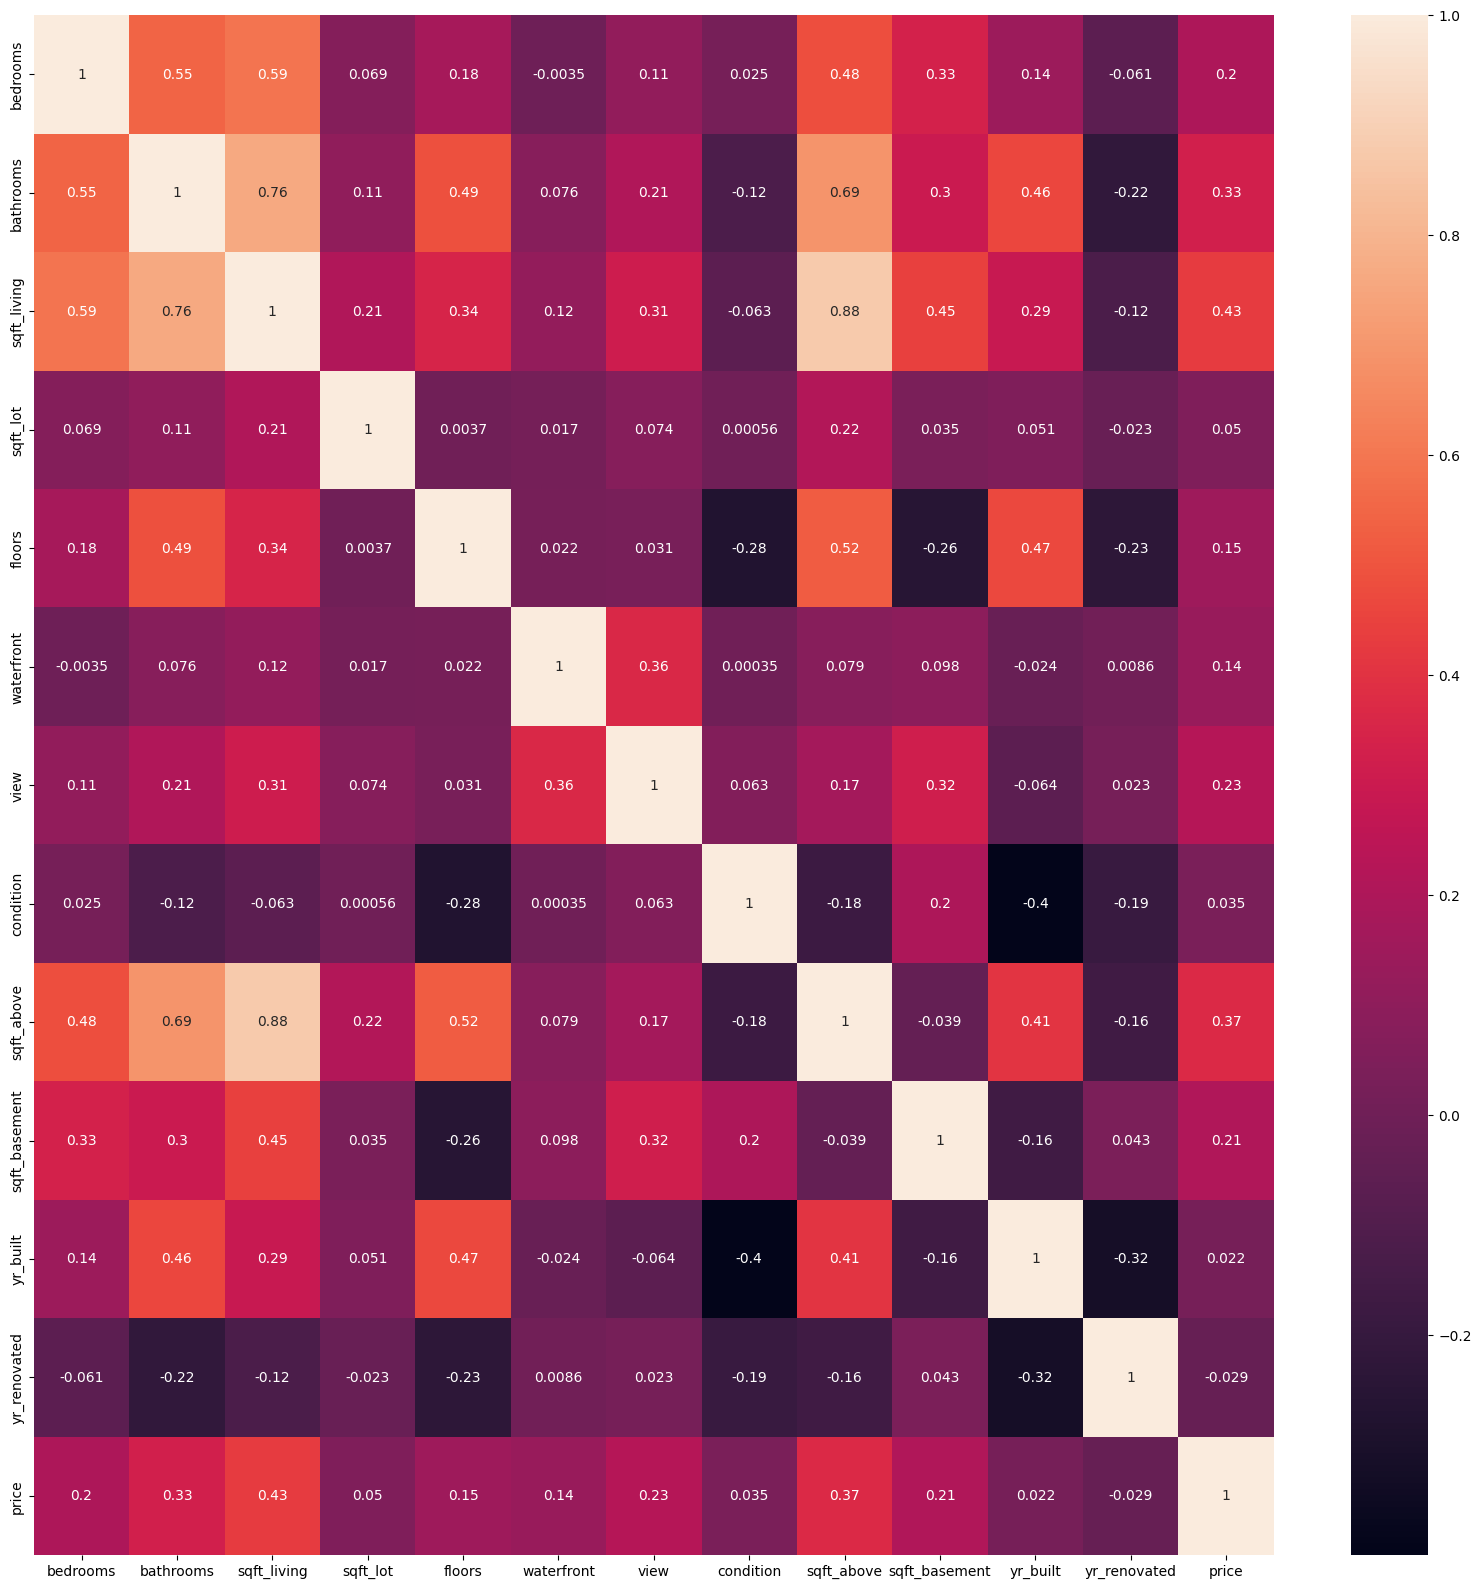

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()
plt.savefig("corrpic.jpg")

In [8]:
x=dataset.iloc[:, :-1]
y=dataset["price"]

In [11]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
lr.score(x_test, y_test)*100

3.2136293347694744

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

211180.0886671265
987072258932.2723
993515.1025184632


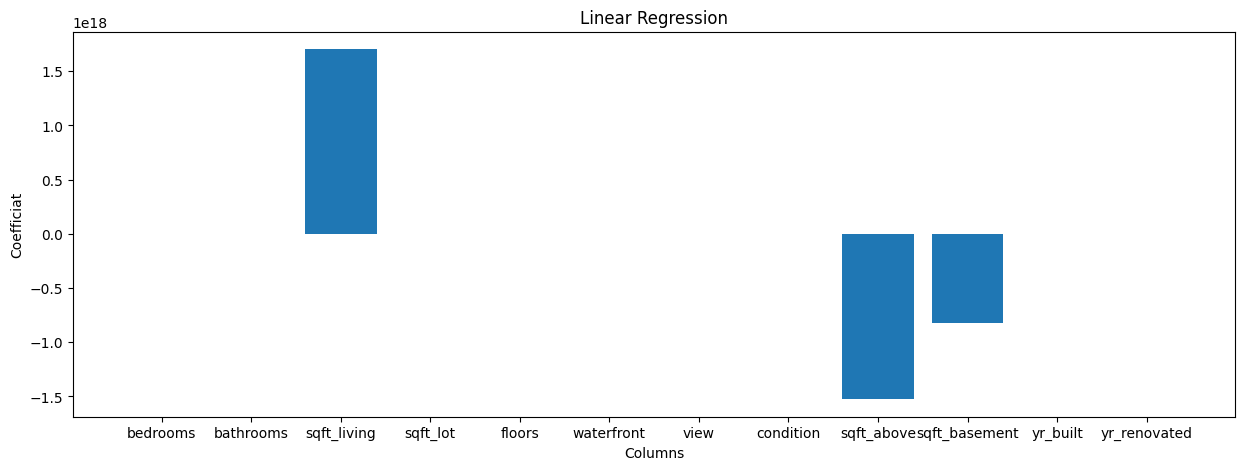

In [20]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coefficiat")
plt.show()

# Lasso

In [22]:
la=Lasso(alpha=10)
la.fit(x_train, y_train)
la.score(x_test, y_test)

C:\Users\it solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+12, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


0.0322839375878059

In [29]:
print(mean_absolute_error(y_test, la.predict(x_test)))
print(mean_squared_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

210905.74607769138
986921684494.3601
993439.3209926614


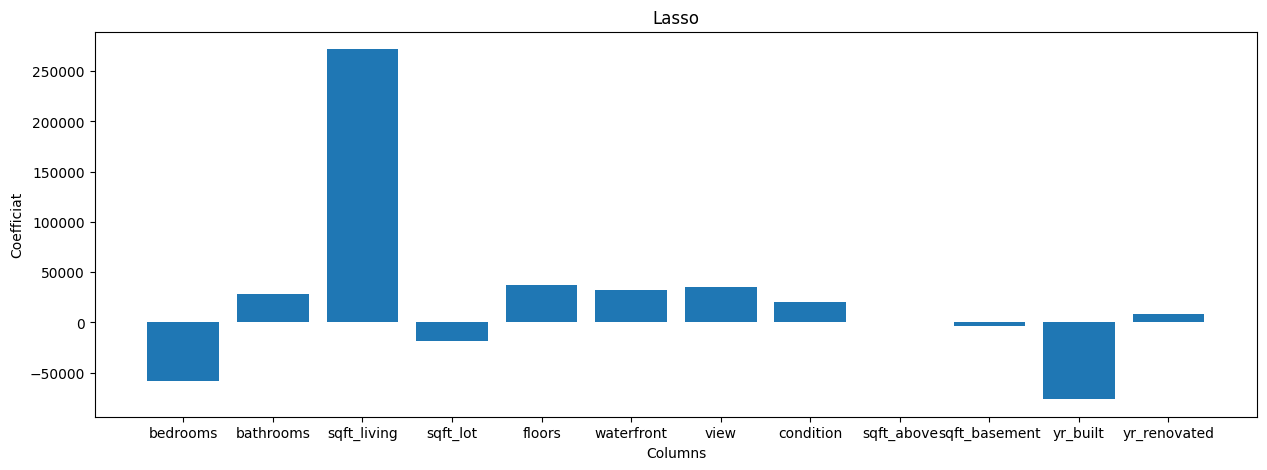

In [23]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coefficiat")
plt.show()

# Ridge

In [24]:
ri=Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)

0.0324019941712842

In [31]:
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(mean_squared_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

210815.94787357948
986801284919.7765
993378.7217973699


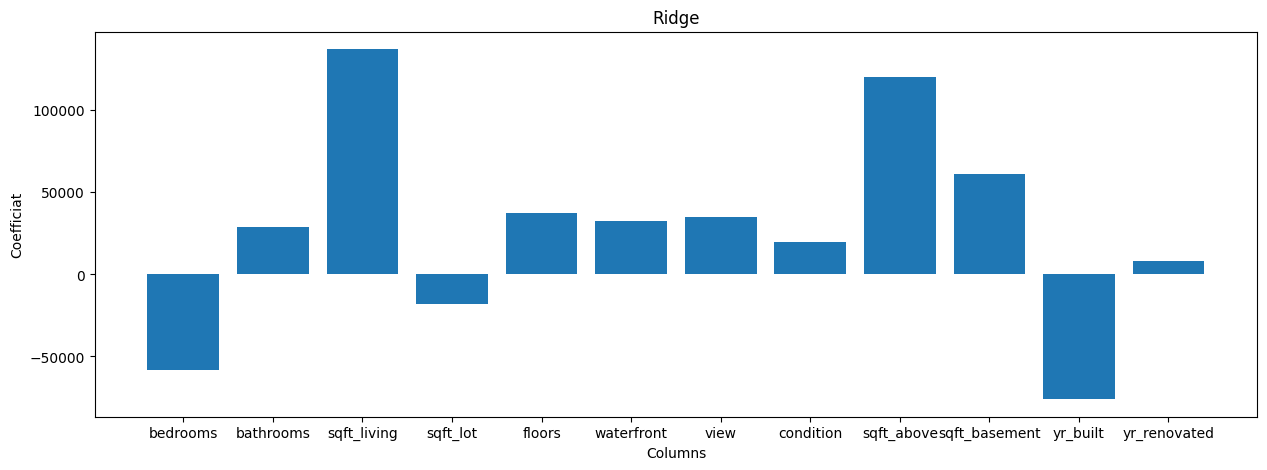

In [25]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coefficiat")
plt.show()

# coefficiant

In [34]:
df=pd.DataFrame({"Column": x.columns, "LinearRegression": lr.coef_, "Lasso":la.coef_, "Ridge": ri.coef_ })
df

,Column,LinearRegression,Lasso,Ridge
0,bedrooms,-5.764256e+04,-58587.834055,-58006.052994
1,bathrooms,2.788278e+04,28585.481411,28878.686086
2,sqft_living,1.702529e+18,271938.930225,137085.109644
3,sqft_lot,-1.840418e+04,-18443.642252,-18298.877275
4,floors,3.660231e+04,37581.039634,37445.130830
5,waterfront,3.231898e+04,32271.977116,32264.182806
6,view,3.497776e+04,34830.156610,34968.321859
7,condition,2.044498e+04,19847.642471,19870.905664
8,sqft_above,-1.523938e+18,466.208981,120223.632684
9,sqft_basement,-8.203919e+17,-3283.197129,61163.461025
